In [1]:
from matplotlib import pyplot as plt
import os, json
import numpy as np

In [ ]:


training_conv = {
    "DSI": ["/datadrive5/namlh35/CodeGR/DSI-QG/models/numid-C-codet5-base-DSI",
               "/datadrive5/namlh35/CodeGR/DSI-QG/models/numid-Ruby-codet5-base-DSI",
               "/datadrive5/namlh35/CodeGR/DSI-QG/models/numid-Rust-codet5-base-DSI",
               "/datadrive5/namlh35/CodeGR/DSI-QG/models/numid-JavaScript-codet5-base-DSI"],
    "DSI-QG": ["/datadrive5/namlh35/CodeGR/DSI-QG/models/numid-C-t5-base-DSI-QG",
               "/datadrive5/namlh35/CodeGR/DSI-QG/models/numid-Ruby-t5-base-DSI-QG",
               "/datadrive5/namlh35/CodeGR/DSI-QG/models/numid-Rust-t5-base-DSI-QG",
               "/datadrive5/namlh35/CodeGR/DSI-QG/models/numid-JavaScript-t5-base-DSI-QG"]
}

markers= ["o", "^", "*", "v"]

def viz_training_convergence(data):
    fig, axs = plt.subplots(1,len(data), figsize=(8,3.5))
    
    read_data = {}
    cnt = 0
    for method in data:
    
        read_data[method] = {}
        for filepath in data[method]:
            dataset_name = filepath.split("/")[-1].split("-")[1]
            with open(os.path.join(filepath, "checkpoint-500000", "trainer_state.json"), "r") as f:
                log_data = json.load(f)["log_history"]
            y_axis = [x["loss"] for x in log_data if "loss" in x]
            x_axis = [x["step"]/1e5 for x in log_data if "loss" in x]
            axs[cnt].plot(x_axis, y_axis, label=dataset_name)
        
        if cnt ==0:
            xtext = 3.8
        else:
            xtext = 5.3
        axs[cnt].set_title(method)
        axs[cnt].text(xtext, -0.6, 'x1e5', dict(size=7))
        
        cnt+=1

    

    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=4, bbox_to_anchor=[0.5, 1.07], fontsize= 11)
    fig.supxlabel('Training Step')
    fig.supylabel('Loss')
    plt.tight_layout()
    # plt.show()
    plt.savefig('test.pdf', bbox_inches='tight')



viz_training_convergence(training_conv)
exit()
            

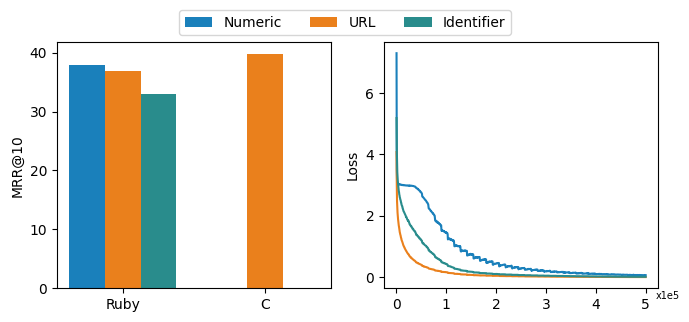

In [2]:
fig, axs = plt.subplots(1,2, figsize=(7,3))
bar_colors=[ "#1a80bb", "#ea801c", "#298c8c"]

Languages = ("Ruby", "C")
methods = {
    'Numeric': (37.85, 0.00),
    'URL': (36.96, 39.81),
    'Identifier': (32.90, 0),
}

x = np.arange(len(Languages))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

for method, mrr in methods.items():
    offset = width * multiplier
    rects = axs[0].bar(x + offset, mrr, width, label=method, color=bar_colors[multiplier])
#     axs[0].bar_label(rects, padding=3)
    multiplier += 1
axs[0].set_xticks(x + width, Languages)
axs[0].set_ylabel("MRR@10")
# x = ["Numeric", "URL", "Identifier"]
# y = [37.85, 36.96, 32.90]
# axs[0].bar(x,y, label=x,  color=bar_colors)
# axs[0].set_xticks([])

data = {
        "Numeric": "/datadrive5/namlh35/CodeGR/DSI-QG/models/numid-Ruby-t5-base-DSI-QG/checkpoint-500000/trainer_state.json",
        "URL": "/datadrive5/namlh35/CodeGR/DSI-QG/models/urlid-Ruby-t5-base-DSI-QG/checkpoint-500000/trainer_state.json",
        "Identifier": "/datadrive5/namlh35/CodeGR/DSI-QG/models/ourid-Ruby-t5-base-DSI-QG_v2/checkpoint-500000/trainer_state.json"
        }

cnt = 0
for method in data:
        with open(data[method], "r") as f:
                log_data = json.load(f)["log_history"]
        y_axis = [x["loss"] for x in log_data if "loss" in x]
        x_axis = [x["step"]/1e5 for x in log_data if "loss" in x]
        axs[1].plot(x_axis, y_axis, label=method, color=bar_colors[cnt])
        cnt += 1
axs[1].text(5.2, -0.7, 'x1e5', dict(size=7))
axs[1].set_ylabel("Loss")
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncols=3, bbox_to_anchor=[0.5, 1.08])
plt.tight_layout()
# plt.show()

plt.savefig('idx_stratey.pdf', bbox_inches='tight')

{'t5-base': [99.116, 97.1425, 98.6468, 0.0189], 't5-large': [99.348, 97.724, 99.05760000000001, 0.0145]}


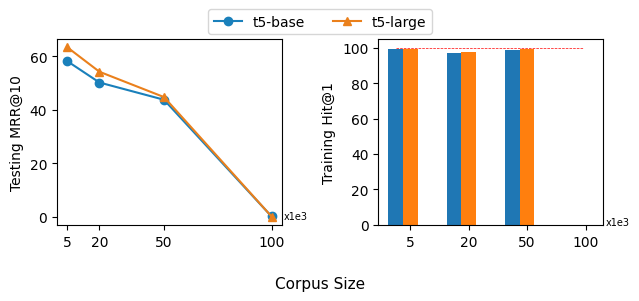

In [59]:
fig, axs = plt.subplots(1,2, figsize=(6.5,2.7))
bar_colors=[ "#1a80bb", "#ea801c", "#298c8c"]

rs_dir = "/datadrive5/namlh35/CodeGR/DSI-QG/models"
size = [5000, 20000, 50000, 100000]
mrr = {}
hit = {}

models = ["t5-base", 't5-large']
for model in models:
    mrr[model] = []
    hit[model] = []
    for s in size:
    
        with open(os.path.join(rs_dir, f"numid-C-{model}-DSI_QG-{s}", "test_metrics.json"), "r") as f:
            mrr[model].append(json.load(f)["test_MRR"]*100)
        
        with open(os.path.join(rs_dir, f"numid-C-{model}-DSI_QG-{s}", "metrics.json"), "r") as f:
            hit[model].append(json.load(f)["test_Hits@1"]*100)
print(hit)
plot_size = [int(x/1000) for x in size]

markers = ["o", "^"]
for i, model in enumerate(models):
    axs[0].plot(plot_size, mrr[model], marker=markers[i], color=bar_colors[i], label = model)
axs[0].set_xticks(plot_size)
axs[0].set_ylabel('Testing MRR@10')
axs[0].text(105.5, -1, 'x1e3', dict(size=7))


x = np.arange(len(size))
width = 0.25  # the width of the bars
multiplier = 0


for attribute, measurement in hit.items():
    offset = width * multiplier
    rects = axs[1].bar(x + offset, measurement, width, label=attribute)
    # axs[1].bar_label(rects, padding=3)
    multiplier += 1
axs[1].plot([0,3.2], [100,100], color="red", lw=0.5, ls="--")
axs[1].set_xticks(x + width, plot_size)
axs[1].text(3.6, 0.1, 'x1e3', dict(size=7))
axs[1].set_ylabel('Training Hit@1')
fig.supxlabel("Corpus Size", fontsize=11)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncols=3, bbox_to_anchor=[0.5, 1.08])

plt.tight_layout()
plt.savefig('size_impact.pdf', bbox_inches='tight')